## **welch y fft en ventanas fijas**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import scipy.signal as signal
import os
import scipy.io as io

import sys
sys.path.append('../data')
from data import load_data

sns.set_style("darkgrid")

In [16]:
# Load data
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low"
fpath =  "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
mat = load_data(fpath, 'file1_050124.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [17]:
df = pd.DataFrame(mat['data'], columns = ['amp', 'amp2'])
df['amp_mean'] = df.amp - df.amp.mean()
df['dif'] = df.amp_mean.diff()
df.tail()

,amp,amp2,amp_mean,dif
599995,2.241190,-2.049442,0.034304,-0.002959
599996,2.236258,-2.049113,0.029372,-0.004932
599997,2.233298,-2.049113,0.026413,-0.002959
599998,2.228037,-2.049113,0.021152,-0.005261
599999,2.225736,-2.049113,0.018850,-0.002302


### **ventanas**
se hacen 10 ventanas de aproximadamente 60.000 pts sin overlap y se hace welch a cada una de ellas


In [18]:
#size = 60000
df_window = np.array_split(df.amp, 300)
df_window = np.array(df_window)
df_window.shape

(300, 2000)

#### **welch**

In [19]:
x = np.zeros([300,129])
_f = []
for i, window in enumerate(df_window):
    f, pxx = signal.welch(window, fs = 1000)#, nperseg = 1024*4, nfft = 4096)
    #print(pxx.shape)
    x[i] = pxx
    _f = f

In [20]:
t = np.linspace(0, 6000, 6000)

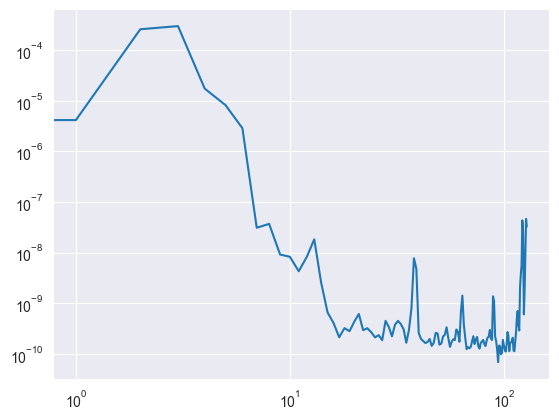

In [21]:
plt.loglog(x[0])
plt.show()

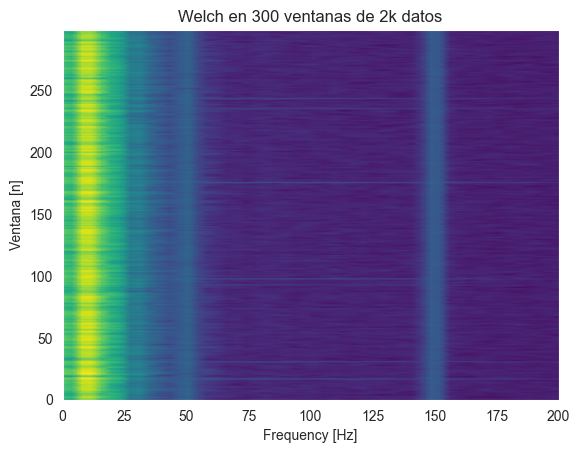

In [22]:
windows = np.arange(0, 300, 1)
plt.pcolormesh(_f,windows, x, shading='gouraud', cmap = 'viridis', norm = 'log')
plt.ylabel('Ventana [n]')
plt.xlabel('Frequency [Hz]')
plt.title('Welch en 300 ventanas de 2k datos')
plt.xlim([0,200])
plt.show()

#### **spectogram**

In [23]:
X = np.zeros([300,501,2])
f_ = []
t_ = []
for i, window in enumerate(df_window):
    f,t, Sxx = signal.spectrogram(window, fs = 1000, nperseg=1000)
    #print(Sxx.shape)
    X[i] = Sxx
    f_ = f
    t_ = t

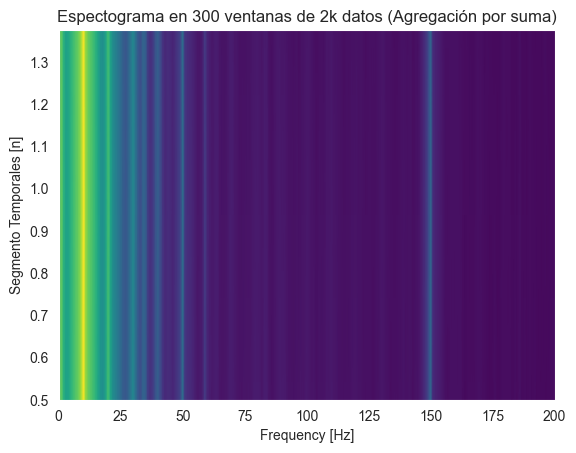

In [26]:
new_X = np.sum(X, axis=0)
plt.pcolormesh(f_, t_, new_X.T, shading='gouraud', cmap = 'viridis', norm = 'log')
#plt.pcolormesh(x, shading='gouraud', cmap = 'viridis')
plt.ylabel('Segmento Temporales [n]')
plt.xlabel('Frequency [Hz]')
plt.title('Espectograma en 300 ventanas de 2k datos (Agregación por suma)')
plt.xlim([0,200])
plt.show()

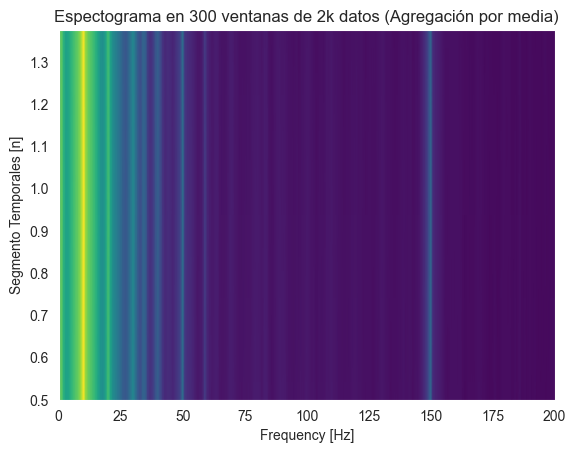

In [28]:
new_X = np.mean(X, axis=0)
plt.pcolormesh(f_, t_, new_X.T, shading='gouraud', cmap = 'viridis', norm = 'log')
#plt.pcolormesh(x, shading='gouraud', cmap = 'viridis')
plt.ylabel('Segmento Temporales [n]')
plt.xlabel('Frequency [Hz]')
plt.title('Espectograma en 300 ventanas de 2k datos (Agregación por media)')
plt.xlim([0,200])
plt.show()